# Classification with CNNs and the CIFAR10 Dataset
We will now apply convolution and pooling layers combined with fully connected layers to classify images from the CIFAR10 dataset. CIFAR10 contains images in the RGB space that have dimensions of 32x32 pixels. Each image falls into 1 of 10 classes: planes, cars, birds, cats, deer, dogs, frogs, horses, ships and trucks. There are 6000 images in each class for a total of 60,000 images.

Researching model architecture, I found an example in the Keras documentation that uses 4 `Conv2d` layers, 4 `MaxPool2d` layers, one hidden fully connected layer with 512 nodes and a final output layer utilizing softmax. 

The goal of this notebook is to implement the same network architecture found in the Keras documentation and apply it using PyTorch.

In [1]:
import torch
import torch.nn.functional as F
from torch import optim, nn
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import numpy as np

import cv2

Let's define some transforms and get our datasets downloaded and into `DataLoader`s. 

Note the order of the transforms in the composition `augment`. While PyTorch docs say that all of these transforms can act on both PIL and Torch image tensors, they work best on PIL images, and can throw errors when acting on Torch image tensors that have not gone through some extra pre-processing. 

In [16]:

augment = transforms.Compose([transforms.RandomHorizontalFlip(),
                              transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5),
                                                   (0.5, 0.5, 0.5))])

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5),
                                                   (0.5, 0.5, 0.5))])


In [17]:
trainset = datasets.CIFAR10('./data/cifar10/', download=True, train=True, transform=augment)
testset = datasets.CIFAR10('./data/cifar10/', download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [18]:
trainload = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=4)
testload = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=True, num_workers=4)

Let's take a look at our first batch, ensuring that everything is loading correctly:

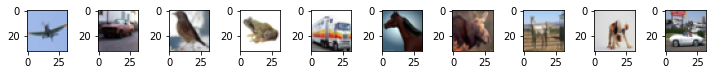

In [25]:
images, labels = iter(trainload).next()

fig, axes = plt.subplots(1, 10, figsize=(10, 15))
for i, im in enumerate(images[:10]):
    im = im.permute(1,2,0) / 2 + 0.5
    axes[i].imshow(im.numpy().squeeze())
plt.tight_layout()
plt.show()

Next, let's set up our our network based on the Keras documentation example:

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        # this layer gets a 
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
        self.pool  = nn.MaxPool2d(2,2)
        self.conv3 = nn.Conv2d(64, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 64, 3, padding=1)
        self.pool  = nn.MaxPool2d(2,2)
        self.fc1   = nn.Linear(32*32*)
        